C:\Users\Windows 11\AppData\Local\Temp\ipykernel_8536\3706011666.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  boston = pd.read_csv(url, delim_whitespace=True, names=names)


El coeficiente de determinación, R² es: 0.4272932070178058


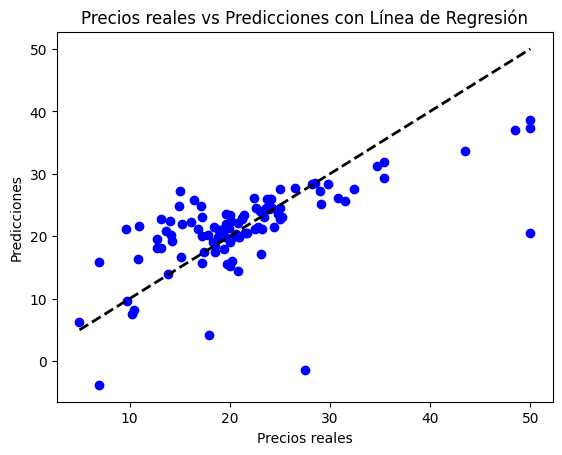

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

# Cargar el conjunto de datos de viviendas de Boston usando pandas
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv(url, delim_whitespace=True, names=names)

# Seleccionar las características y el precio de las viviendas
X = boston[[ 'CRIM','RM']]
y = boston['MEDV']  # Precio de las viviendas

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo usando los conjuntos de entrenamiento
modelo.fit(X_train, y_train)

# Realizar predicciones usando el conjunto de prueba
predicciones = modelo.predict(X_test)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, predicciones)
print(f"El coeficiente de determinación, R² es: {r2}")

# Visualizar los resultados (comparando precios reales vs predicciones con Línea de regresión)
plt.scatter(y_test, predicciones, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea de regresión ideal
plt.xlabel('Precios reales')
plt.ylabel('Predicciones')
plt.title('Precios reales vs Predicciones con Línea de Regresión')
plt.show()


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


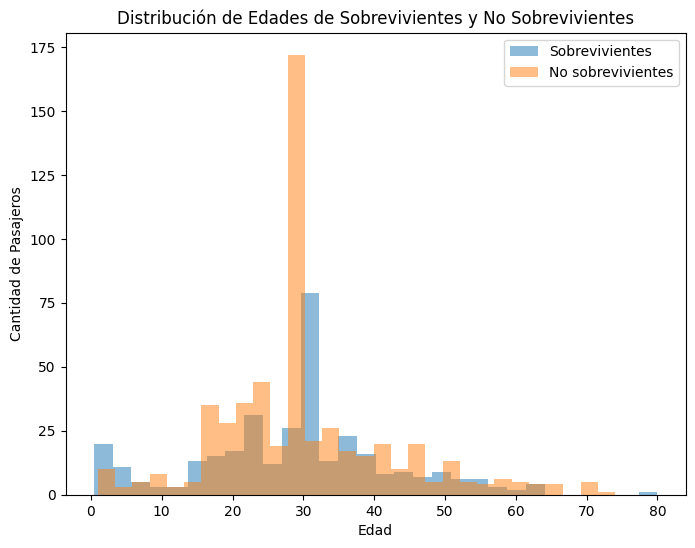

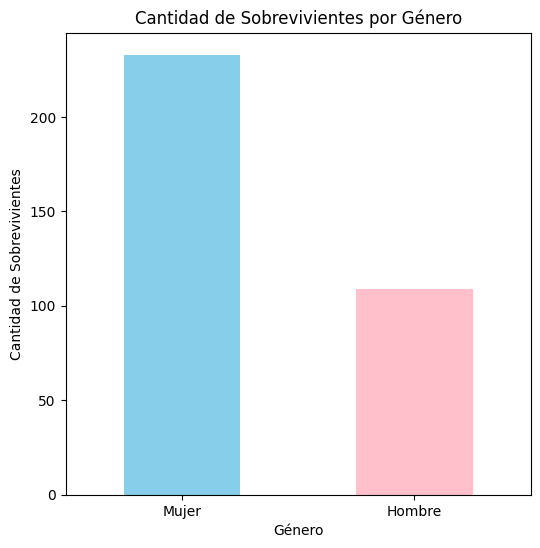

Precisión del modelo: 0.8100558659217877
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Cargar el conjunto de datos del Titanic
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Visualizar las primeras filas del dataset
print(data.head())

# Eliminar columnas irrelevantes o con datos faltantes
data = data.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

# Manejar datos faltantes (en este caso, rellenar los valores faltantes con la media)
imputer = SimpleImputer(strategy='mean')
data['Age'] = imputer.fit_transform(data['Age'].values.reshape(-1, 1))

# Convertir variables categóricas a variables dummy
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

# Dividir los datos en características (features) y etiquetas (labels)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de clasificación (Regresión Logística)
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
predictions = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

# Visualización: Histograma de edades
plt.figure(figsize=(8, 6))
plt.hist(data[data['Survived'] == 1]['Age'], bins=30, alpha=0.5, label='Sobrevivientes')
plt.hist(data[data['Survived'] == 0]['Age'], bins=30, alpha=0.5, label='No sobrevivientes')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Pasajeros')
plt.title('Distribución de Edades de Sobrevivientes y No Sobrevivientes')
plt.legend()
plt.show()

# Visualización: Gráfico de barras de la cantidad de sobrevivientes por género
survived_gender = data.groupby('Sex_male')['Survived'].sum()
plt.figure(figsize=(6, 6))
survived_gender.plot(kind='bar', color=['skyblue', 'pink'])
plt.xticks([0, 1], ['Mujer', 'Hombre'], rotation=0)
plt.xlabel('Género')
plt.ylabel('Cantidad de Sobrevivientes')
plt.title('Cantidad de Sobrevivientes por Género')
plt.show()

# Imprimir la precisión del modelo y el informe de clasificación
print(f'Precisión del modelo: {accuracy}')
print('Informe de clasificación:')
print(report)
